In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
# pathy=pathMAC
pathy=pathchow

In [3]:
path=pathy+'/data/tempsweep_radial__2022-04-30-16-05-32'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])


reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__6/data2022-04-30-09-50-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__5/data2022-04-30-08-02-38.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__9/data2022-04-30-14-47-39.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__8/data2022-04-30-13-19-19.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__2/data2022-04-30-02-50-07.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__10/data2022-04-30-16-05-31.h5
reading data  /

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]


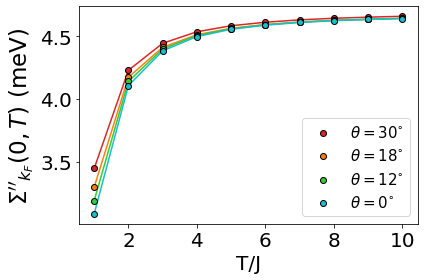

In [7]:

thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
listcol=['tab:cyan','limegreen','tab:orange','tab:red']
listcol=listcol[::-1]
thets=np.array([thets[0],thets[2],thets[3],thets[5]])
thlabel=[30,18,12,0]
for l,th in enumerate(thets):
    df2=df.loc[(df['freq'] ==0 )&(df['theta'] ==th )]

    plot(df2['T'].loc[(df2['T'] <11 )],df2['SE'].loc[(df2['T'] <11 )],c=listcol[l], zorder=0)
    scatter(df2['T'].loc[(df2['T'] <11 )],df2['SE'].loc[(df2['T'] <11 )], edgecolor='k', label=r"$\theta =$"+str(thlabel[l])+r"$^{\circ}$", zorder=2, c=listcol[l])
    # plt.scatter(df2['T'],df2['SE'])
    xticks(size=20)
    yticks(size=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    legend(prop={'size': 15})
plt.xlabel('T/J', size=20)
plt.ylabel(r"$\Sigma''_{k_F}(0, T)$ (meV)", size=23)
plt.tight_layout()    
plt.savefig("imgs/pap_fig1b", dpi=400)
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

In [ ]:

thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
listcol=['tab:cyan','limegreen','tab:orange','tab:red']
listcol=listcol[::-1]
thets=np.array([thets[0],thets[2],thets[3],thets[5]])
thlabel=[30,18,12,0]
for l,th in enumerate(thets):
    df2=df.loc[(df['freq'] ==0 )&(df['theta'] ==th )]

    plot(df2['T'].loc[(df2['T'] <11 )],df2['SE'].loc[(df2['T'] <11 )],c=listcol[l], zorder=0)
    scatter(df2['T'].loc[(df2['T'] <11 )],df2['SE'].loc[(df2['T'] <11 )], edgecolor='k', label=r"$\theta =$"+str(thlabel[l])+r"$^{\circ}$", zorder=2, c=listcol[l])
    # plt.scatter(df2['T'],df2['SE'])
    xticks(size=20)
    yticks(size=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    legend(prop={'size': 15})
plt.xlabel('T/J', size=20)
plt.ylabel(r"$\Sigma''_{k_F}(0, T)$ (meV)", size=23)
plt.tight_layout()    
plt.savefig("imgs/pap_fig1b", dpi=400)
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')